In [1]:
import numpy as np

#i import pandas for data anlysis and manipulations
import pandas as pd

#matplotlib library for plotting 2D graphics
import matplotlib.pyplot as plt

In [2]:
#importing the book ratings dataframe from the load_dataset module i created


from Nifi_joint_loaddata_module import loaddataset



#calling the loaddataset class from the module

dataset = loaddataset('ratings', 'books', 'users', 'book_ratings2')

In [3]:
#calling the book_rating method of the loaddataset object to load the book rating dataframe
df= dataset.get_book_ratings2()
df.head()

,user_id,book_id,bookrating,booktittle,book_author,year_of_pub
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001


In [32]:
df.shape

(1030994, 6)

In [30]:
df = df.applymap(lambda x: np.nan if x == 'NA' else x)
#df.head()

In [31]:
df.isna().sum()

user_id        0
book_id        0
bookrating     0
booktittle     0
book_author    1
year_of_pub    0
dtype: int64

# Check for total unique users and books

In [17]:


# Get the total unique users
total_unique_users = df['user_id'].nunique()

# Get the total unique book IDs
total_unique_book_ids = df['book_id'].nunique()

# Get the total unique book titles
total_unique_book_titles = df['booktittle'].nunique()

# Get the total unique book authors
total_unique_book_authors = df['book_author'].nunique()

# Get the total unique years of publication
total_unique_years_of_pub = df['year_of_pub'].nunique()

# Create a DataFrame to store the unique total counts
unique_counts_df = pd.DataFrame({
    'Total Unique Users': [total_unique_users],
    'Total Unique Book IDs': [total_unique_book_ids],
    'Total Unique Book Titles': [total_unique_book_titles],
    'Total Unique Book Authors': [total_unique_book_authors],
    'Total Unique Years of Publication': [total_unique_years_of_pub]
})


unique_counts_df

,Total Unique Users,Total Unique Book IDs,Total Unique Book Titles,Total Unique Book Authors,Total Unique Years of Publication
0,92099,270125,241041,101574,116


# check for Null values

In [18]:
missing_values = df.isnull().sum()
missing_values

user_id        0
book_id        0
bookrating     0
booktittle     0
book_author    1
year_of_pub    0
dtype: int64

# Checking for ratings distribution

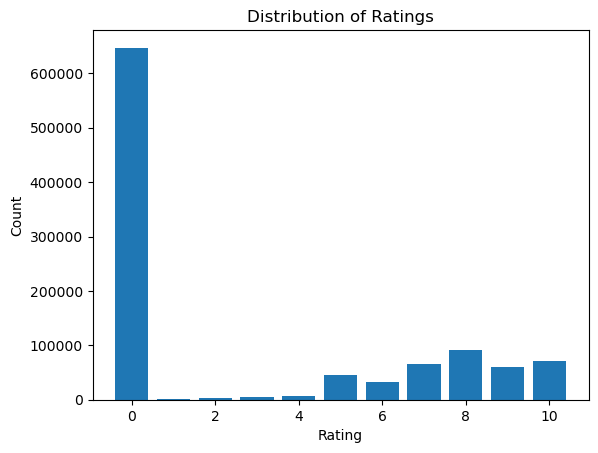

In [22]:


# Count the occurrences of each rating value
rating_counts = df['bookrating'].value_counts()

# Sort the ratings in ascending order for better visualization
rating_counts_sorted = rating_counts.sort_index()

# Create the bar chart
plt.bar(rating_counts_sorted.index, rating_counts_sorted.values)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

# Show the plot
plt.show()


# get the top N most rated books and their corresponding total ratings 

In [24]:


# Group by 'bookid' and calculate the total ratings for each book
book_ratings_count = df.groupby('book_id')['bookrating'].count().reset_index()
book_ratings_count.columns = ['book_id', 'total_ratings']


N = 10
# Sort the DataFrame in descending order based on 'total_ratings'
top_n_most_rated_books = book_ratings_count.sort_values(by='total_ratings', ascending=False).head(N)

# Print the DataFrame
top_n_most_rated_books


,book_id,total_ratings
215931,0971880107,2501
38570,0316666343,1295
70797,0385504209,883
7344,0060928336,732
32370,0312195516,723
87394,044023722X,647
21342,0142001740,615
145037,067976402X,613
133137,0671027360,585
93844,0446672211,585


# filter the popular books that has N ratings counts to reduce the data size for fast processing time 

In [64]:
import pandas as pd


# Define the number of total ratings you want to filter on
N = 400

# Group by 'bookid' and calculate the total ratings for each book
book_ratings_count = df.groupby('book_id')['bookrating'].count().reset_index()
book_ratings_count.columns = ['book_id', 'total_ratings']

# Filter the DataFrame to include only book IDs with total ratings equal to N
top_n_rated_books_with_N_ratings = book_ratings_count[book_ratings_count['total_ratings'] >= N]

# Merge with the original DataFrame to get the complete rows of popular books
books_pop = pd.merge(df, top_n_rated_books_with_N_ratings, on='book_id', how='inner')

# Print the DataFrame
books_pop.head()


,user_id,book_id,bookrating,booktittle,book_author,year_of_pub,total_ratings
0,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,1295
1,277195,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,1295
2,277413,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,1295
3,277427,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,1295
4,277439,0316666343,7,The Lovely Bones: A Novel,Alice Sebold,2002,1295


In [65]:
books_pop.shape

(22854, 7)

# save the dataframe of the popular books

In [66]:
books_pop.to_csv('Book_ratingC>400.csv', index=False)